In [9]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
# Read CSV
unemployed_data_one = pd.read_csv("../Resources/unemployment_2010-2011.csv")
unemployed_data_two = pd.read_csv("../Resources/unemployment_2012-2014.csv")

# Merge our two data frames together
combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
combined_unemployed_data.head()

,Country Name,Country Code_x,2010,2011,Country Code_y,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,AFG,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,AGO,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,ALB,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,ARB,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,ARE,9.800000,9.900000,10.000000


In [11]:
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
del combined_unemployed_data['Country Code_y']
combined_unemployed_data = combined_unemployed_data.rename(columns={"Country Code_x":"Country Code"})
combined_unemployed_data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [15]:
# Set the 'Country Code' to be our index for easy referencing of rows
combined_unemployed_data = combined_unemployed_data.set_index("Country Code")
combined_unemployed_data

,Country Name,2010,2011,2012,2013,2014
Country Code,,,,,,
AFG,Afghanistan,20.600000,20.900000,19.700001,21.100000,20.799999
AGO,Angola,10.800000,10.700000,10.700000,10.600000,10.500000
ALB,Albania,25.799999,27.000000,28.299999,28.700001,29.200001
ARB,Arab World,25.022214,28.117516,29.113212,29.335306,29.704569
ARE,United Arab Emirates,9.800000,9.800000,9.800000,9.900000,10.000000
ARG,Argentina,19.500000,18.799999,18.400000,19.700001,21.299999
ARM,Armenia,38.299999,38.700001,35.000000,32.500000,35.099998
AUS,Australia,11.400000,11.400000,11.700000,12.200000,13.100000
AUT,Austria,8.800000,8.200000,8.700000,9.100000,9.200000


In [17]:
# Collect the mean unemployment rates for the world
average_unemployment = combined_unemployed_data.mean()
average_unemployment

2010    17.892957
2011    17.902713
2012    18.148142
2013    18.100429
2014    17.943539
dtype: float64

In [18]:
# Collect the years where data was collected
years = average_unemployment.keys()
years

Index(['2010', '2011', '2012', '2013', '2014'], dtype='object')

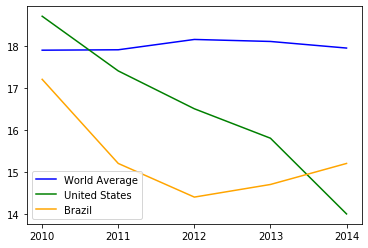

In [20]:
# Plot the world average as a line chart
world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

brazil, = plt.plot(years, combined_unemployed_data.loc['BRA',["2010","2011","2012","2013","2014"]], 
                        color="orange",label=combined_unemployed_data.loc['BRA',"Country Name"])


# Create a legend for our chart
plt.legend(handles=[world_avg, country_one, brazil], loc="best")

# Show the chart
plt.show()

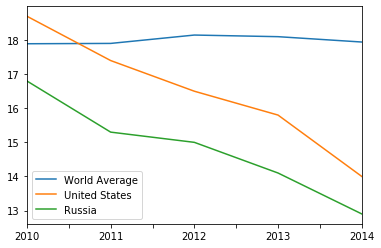

In [21]:
average_unemployment.plot(label="World Average")
combined_unemployed_data.loc['USA', "2010":"2014"].plot(label="United States")
combined_unemployed_data.loc['RUS', "2010":"2014"].plot(label="Russia")
plt.legend()
plt.show()